urllib              =>                  requests
(GET)       Encoding =>  Charset (MIME - content - type); 본문내용 (str ? )
                        (HTML) HTML Entity (&#10진수;)
            URL Encoding(Bytes) => Hexadecimal => 
urlparse                                 params = {}, [(k.v)], bytes
parse_qs(l)
urlunparse                               
user-agent
req = user-agent
urlopen (str or req obj)                request(url, params, data, headers ...)
read()
decode() => str

try - except status_code                resp.status_code, raise_for_status
body -> HTML -> re(필요한 부분 추출; title)
3사 (Google, Naver, Daum) 검색결과 사용 X => re

In [1]:
from requests import request

headers = {
    'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}


In [2]:
url = 'https://www.google.com/search'

params = {
    'q' : '뉴진스'
}

resp = request('GET', url, params=params)

In [3]:
resp.encoding

'ISO-8859-1'

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>&#45684;&#51652;&#49828; - Google &#44160;&#49353;</title><script nonce="jaLrrchzZWdBv-RN46NYDQ">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.
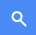
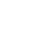
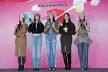
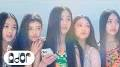
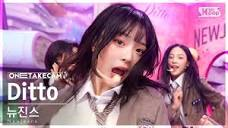
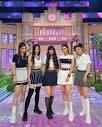
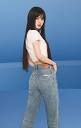
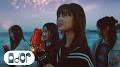
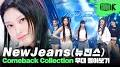

In [5]:
resp.text #UTF-8 안함.

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>뉴진스 - Google 검색</title><script nonce="jaLrrchzZWdBv-RN46NYDQ">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var h=func
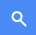
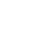
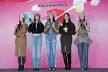
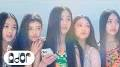
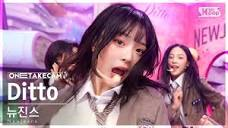
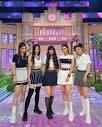
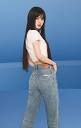
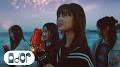
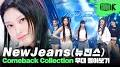

In [4]:
from html import unescape
unescape(resp.text)

In [11]:
resp.status_code, resp.encoding, resp.request.headers

(200,
 'ISO-8859-1',
 {'User-Agent': 'python-requests/2.28.2', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'})

('UTF-8',
 {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'},
 '<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>뉴진스 - Google 검색</title><script nonce="76RdetdwR5VBl3VWnOiwDA">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'0HKjZOqeH_Wv2roPzPidgAE\',kEXPI:\'31\',kBL:\'VNBp\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&
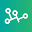
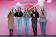
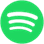
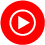
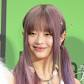
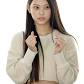
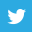
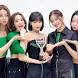
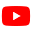
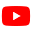
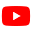
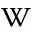
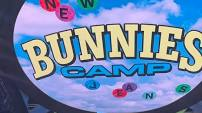
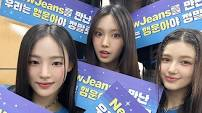
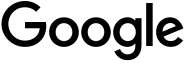
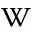

In [12]:
# 나의 user-agent 도입.
resp = request('GET',  url, params=params, headers=headers)
resp.encoding, resp.request.headers, resp.text

# ua가 브라우저와 다를 경우, class값 등 다른 정보를 보여주게 되기 때문에 가능하면 ua를 적용하는 것이 좋다.
# 또한, 인코딩 타입도 달라지게 된다. ISO-8859-1~~~

# 태그 : <> </> 여는 닫는 
class 정보가 찾는 정보에 포함되어야 함.


In [13]:
import re

In [18]:
p = re.compile(r'<h3 class="LC20lb MBeuO DKV0Md">(.+?)</h3>')
p.findall(resp.text) # 뉴진스 나무위키 검색어 클래스 번호


['NewJeans - 나무위키',
 'NewJeans - YouTube',
 '뉴진스와 함께할 새로운 계절을 기다리며   &#39;Attention&#39;부터 &#39;OMG ...',
 '뉴진스(NewJeans) [뮤직뱅크/Music Bank] | KBS 230127 방송',
 'NewJeans - 위키백과, 우리 모두의 백과사전']

In [20]:
re.findall('LC20lb MBeuO DKV0Md.................', resp.text)

['LC20lb MBeuO DKV0Md">NewJeans - 나무위키',
 'LC20lb MBeuO DKV0Md">NewJeans - YouT',
 'LC20lb MBeuO DKV0Md">뉴진스와 함께할 새로운 계절',
 'LC20lb MBeuO DKV0Md">뉴진스(NewJeans) [',
 'LC20lb MBeuO DKV0Md">NewJeans - 위키백과',
 'LC20lb MBeuO DKV0Md\\x22\\x3e\\ubbfc\\uc',
 'LC20lb MBeuO DKV0Md\\x22\\x3eNewJeans ',
 'LC20lb MBeuO DKV0Md\\x22\\x3eNewJeans ']

In [24]:
p = re.compile(r'yuRUbf"><a href="(.+?)"')
p.findall(resp.text)
# 정규식으로만 찾는 것은 한계가 있음.

['https://namu.wiki/w/NewJeans',
 'https://www.youtube.com/@NewJeans_official',
 'https://ko.wikipedia.org/wiki/NewJeans']

In [25]:
url = 'https://search.daum.net/search'
params = {
    'w' : 'tot',
    'q' : '뉴진스'
}

resp = request('GET', url, params=params, headers=headers)

In [26]:
resp.status_code, resp.reason, resp.request.headers

(200,
 'OK',
 {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'})

In [43]:
p = re.compile(r'tit_main fn_tit_u[^>]+?>(.+?)</a')
list(map(lambda row: re.sub(r'^\s|\s$|<.+?>|\[.+?\]|[‘’“”…]', '', row), p.findall(resp.text)))


['뉴진스, 팬미팅서 신곡 ETA 최초 공개또 음원차트 점령하겠네',
 '7년 추적한 뽕으로 BIFAN 진출한 뉴진스 아빠 250 뉴진스보다 뽕 앨범이 효자',
 ' OMG 뉴진스가 돌아온다... 하이브에 쏠린 눈',
 '뉴진스, 첫 팬미팅 성료신곡 ETA 무대 최초 공개']

# 탐색순서
id -> class -> href -> wrap_cont

In [78]:
p = re.compile(r'tit_main fn_tit_u.+?href=.+?" o')
p.findall(resp.text)

['tit_main fn_tit_u" onclick=\'smartLog(this, "dc=NNS&p=14&d=26LavDeDReEDw-4cFt&pg=1&r=1&rc=4&e1=16fEGriEE1VVeRH5aC&e3=0&ext=dsid=26LavDeDReEDw-4cFt", event, {"cpid": {"value": "16fEGriEE1VVeRH5aC"}});\' href="https://v.daum.net/v/20230703080603970?f=o" target="_blank"> <b>뉴진스</b>, 팬미팅서 신곡 ‘ETA’ 최초 공개…또 음원차트 점령하겠네 </a> <p class="desc"> [뉴스엔 황혜진 기자] 그룹 <b>뉴진스</b>(NewJeans)가 중독적 신곡으로 음원 차트 1위 점령을 예고했다. <b>뉴진스</b>(민지, 하니, 다니엘, 해린, 혜인)는 7월 1일과 2일 양일간 서울 송파구 SK 올림픽 핸드볼 경기장에서 첫 팬미팅 ‘Bunnies Camp’를 열고 팬 버니즈와 특별한... </p> <span class="cont_info"> <a href="https://v.daum.net/channel/67/home" class="f_nb" target="_blank"> 뉴스엔 </a> <span class="f_nb">2023.07.03</span> <a data-action-type="ks" href="http://v.daum.net/v/20230703080603970" o',
 'tit_main fn_tit_u" onclick=\'smartLog(this, "dc=NNS&p=14&d=26Ku58fG0HtC2rgMtO&pg=1&r=2&rc=4&e1=16r-VpcwXoB6dfuaXM&e3=0&ext=dsid=26Ku58fG0HtC2rgMtO", event, {"cpid": {"value": "16r-VpcwXoB6dfuaXM"}});\' href="https://v.daum.net/v/20230704060012578?f=o" target=

In [90]:
p = re.compile(r'<c-menu-share.+?data-title="(.+?)"')
list(map(lambda row: re.sub(r'^\s|\s$|<.+?>|\[.+?\]|[‘’“”…|\'\"]|[#39;]|[\U0001fae2]|[&amp]', '', row), p.findall(resp.text)))

['NewJens',
 '뉴진스 신곡 ETA 팬미팅 선공개',
 '뉴진스 혜인',
 '뉴진스 2nd EP 신곡 티저 해외반응',
 '뉴진스 멤버 프로필 나이 키 국적 과거',
 '뉴진스(New Jens) ASAP 티저',
 'ldquo완전 똑같은데hellirdquo 뉴진스 신곡, 이번에도 예측했다는 무한도전',
 '뉴진스, 뉴진스 돌풍 다시 일으킬까...7월 21일 새 앨범 겟 업']

In [86]:
unescape('&amp')

'&'

In [91]:
url = "https://search.naver.com/search.naver"

params = {
    'where' : 'nexearch',
    'query' : '뉴진스'
}

resp = request('GET', url, params=params, headers=headers)

resp.status_code, resp.reason, resp.request.headers

(200,
 'OK',
 {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'})

In [92]:
resp.url

'https://search.naver.com/search.naver?where=nexearch&query=%EB%89%B4%EC%A7%84%EC%8A%A4'

In [95]:
from string import punctuation

In [97]:
p = re.compile(r'news_tit[^>]+?>(.+?)</a')
list(map(lambda row:re.sub(f'[{re.escape(punctuation)}]|[mark]','',row), p.findall(resp.text)))


['뉴진스 캠프 콘셉트 팬미팅도 수준 높네…신곡 ETA 첫 공개',
 '단독 시총 11조 회사 클라쓰…BTS 집 하이브 사옥 가보니 윤현주의 主食',
 '투자노트 ‘OMG’ 뉴진스가 돌아온다 하이브에 쏠린 눈',
 'X why ZZ세대가 뉴진스 앨범을 기다리는 이유는 뭘까']

In [109]:
p = re.compile(r'<a href="([^"]+)?" class="news_tit')
p.findall(resp.text)

['http://www.newsis.com/view/?id=NISX20230703_0002360844&cID=10601&pID=10600',
 'https://www.hankyung.com/finance/article/202307027863i',
 'https://biz.chosun.com/stock/analysis-prospect/2023/07/03/KUY2KAL4FFAPVIQ3PHLA5EUPJA/?utm_source=naver&utm_medium=original&utm_campaign=biz',
 'https://isplus.com/article/view/isp202307030091']